In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [3]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

## question 10

In [4]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [6]:
olivetti.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [7]:
#stratified sampling 
#stratifieshufflesplit return iterator
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1,test_size = 0.1,random_state = 42)
for train_val_index,test_index in sss.split(olivetti.data,olivetti.target):
    x_train_val = olivetti.data[train_val_index]
    y_train_val = olivetti.target[train_val_index]
    x_test =  olivetti.data[test_index]
    y_test =  olivetti.target[test_index]
sss_val = StratifiedShuffleSplit(n_splits = 1,test_size = 80,random_state = 42)
for train_index,val_index in sss_val.split(x_train_val,y_train_val):
    x_train = x_train_val[train_index]
    y_train = y_train_val[train_index]
    x_val =  x_train_val[val_index]
    y_val =  y_train_val[val_index]



In [8]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [9]:
#featured are much more than no. of samples so lets reeduce dimeansion first 
from sklearn.decomposition import PCA
pca = PCA(0.99)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca =  pca.transform(x_test)


In [10]:
pca.n_components_

200

In [11]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
len(cumsum)

200

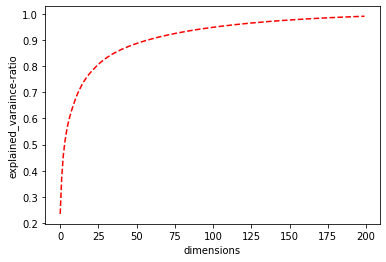

In [12]:

plt.plot(range(0,200),cumsum,"r--")
plt.ylabel("explained_varaince-ratio")
plt.xlabel("dimensions")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
s_score1 = []
s1 = []
for k in range(20,200,5):
   kmeans = KMeans(n_clusters = k, random_state= 42)
   kmeans.fit(x_train_pca)
   s_score =  silhouette_score(x_train_pca,kmeans.labels_)
   s_score1.append(s_score)
   s = kmeans.inertia_
   s1.append(s)
    
    

In [14]:
best_index = np.argmax(s_score1)
best_k = range(20,200,5)[best_index]
best_score = s_score1[best_index]
best_inertia =s1[best_index]

Text(0, 0.5, 'inertia')

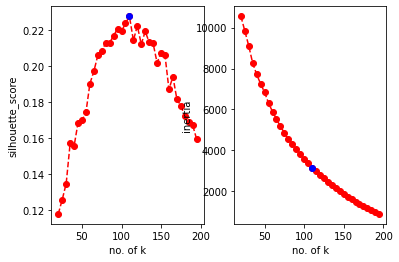

In [15]:
plt.subplot(1,2,1)
plt.plot(range(20,200,5),s_score1,"ro--")
plt.plot(best_k,best_score,"bo")
plt.xlabel("no. of k")
plt.ylabel("silhouette_score")
plt.subplot(1,2,2)
plt.plot(range(20,200,5),s1,"ro--")
plt.plot(best_k,best_inertia,"bo")
plt.xlabel("no. of k")
plt.ylabel("inertia")

In [16]:
best_k

110

In [17]:
kmeans = KMeans(n_clusters = 110, random_state= 42)
kmeans.fit(x_train_pca)

KMeans(n_clusters=110, random_state=42)

Cluster 0


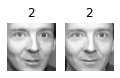

Cluster 1


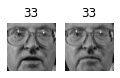

Cluster 2


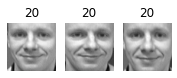

Cluster 3


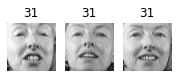

Cluster 4


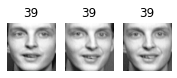

Cluster 5


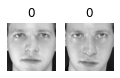

Cluster 6


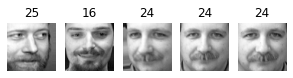

Cluster 7


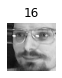

Cluster 8


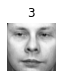

Cluster 9


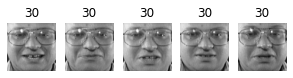

Cluster 10


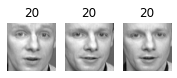

Cluster 11


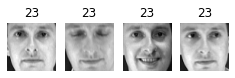

Cluster 12


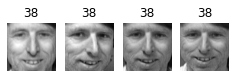

Cluster 13


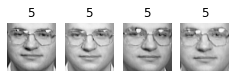

Cluster 14


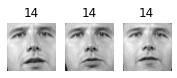

Cluster 15


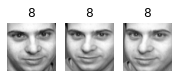

Cluster 16


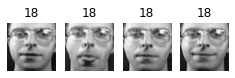

Cluster 17


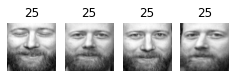

Cluster 18


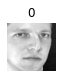

Cluster 19


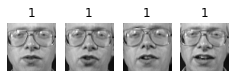

Cluster 20


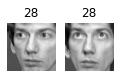

Cluster 21


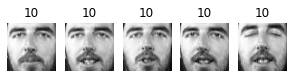

Cluster 22


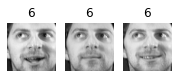

Cluster 23


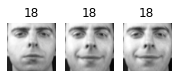

Cluster 24


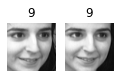

Cluster 25


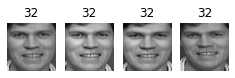

Cluster 26


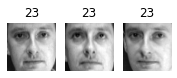

Cluster 27


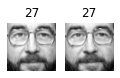

Cluster 28


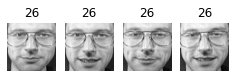

Cluster 29


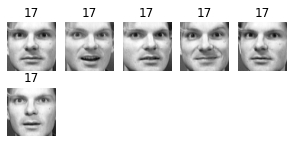

Cluster 30


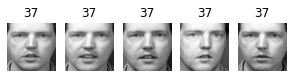

Cluster 31


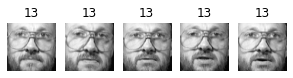

Cluster 32


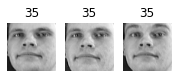

Cluster 33


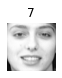

Cluster 34


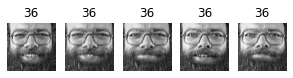

Cluster 35


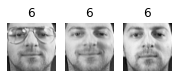

Cluster 36


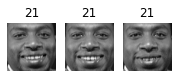

Cluster 37


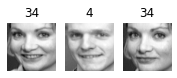

Cluster 38


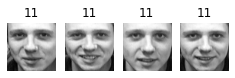

Cluster 39


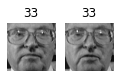

Cluster 40


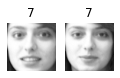

Cluster 41


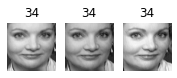

Cluster 42


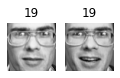

Cluster 43


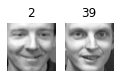

Cluster 44


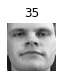

Cluster 45


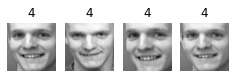

Cluster 46


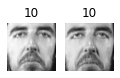

Cluster 47


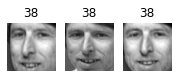

Cluster 48


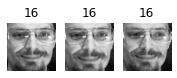

Cluster 49


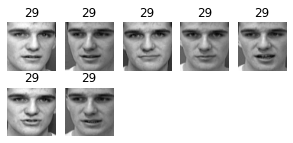

Cluster 50


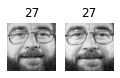

Cluster 51


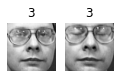

Cluster 52


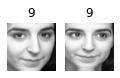

Cluster 53


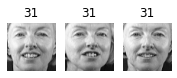

Cluster 54


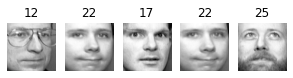

Cluster 55


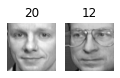

Cluster 56


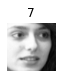

Cluster 57


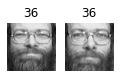

Cluster 58


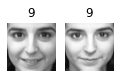

Cluster 59


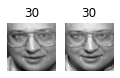

Cluster 60


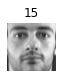

Cluster 61


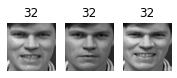

Cluster 62


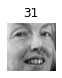

Cluster 63


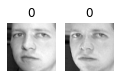

Cluster 64


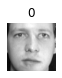

Cluster 65


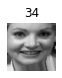

Cluster 66


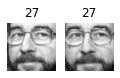

Cluster 67


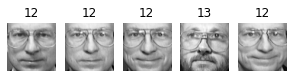

Cluster 68


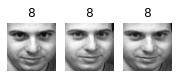

Cluster 69


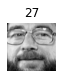

Cluster 70


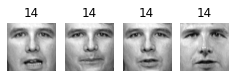

Cluster 71


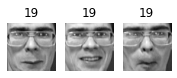

Cluster 72


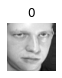

Cluster 73


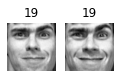

Cluster 74


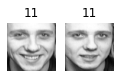

Cluster 75


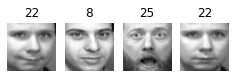

Cluster 76


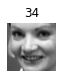

Cluster 77


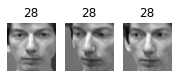

Cluster 78


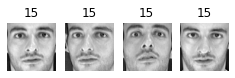

Cluster 79


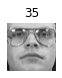

Cluster 80


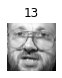

Cluster 81


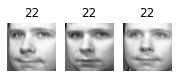

Cluster 82


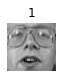

Cluster 83


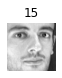

Cluster 84


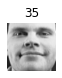

Cluster 85


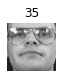

Cluster 86


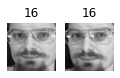

Cluster 87


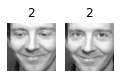

Cluster 88


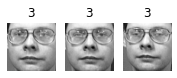

Cluster 89


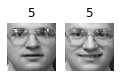

Cluster 90


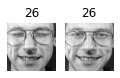

Cluster 91


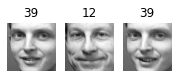

Cluster 92


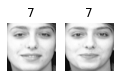

Cluster 93


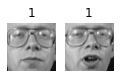

Cluster 94


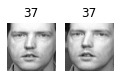

Cluster 95


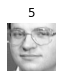

Cluster 96


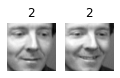

Cluster 97


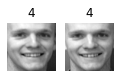

Cluster 98


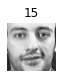

Cluster 99


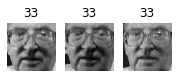

Cluster 100


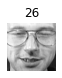

Cluster 101


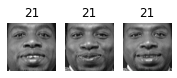

Cluster 102


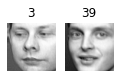

Cluster 103


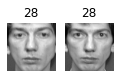

Cluster 104


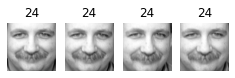

Cluster 105


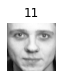

Cluster 106


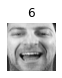

Cluster 107


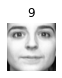

Cluster 108


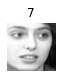

Cluster 109


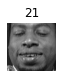

In [18]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) -1) // n_cols+1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans.labels_==cluster_id
    faces = x_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)


## question 11

In [19]:
#classify each picture first
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_pca,y_train)
rfc.score(x_val_pca,y_val)



0.9

In [20]:
'''to use clustering as dimensionality reduction we train kmeans and them transform data into reduced
data which is k dimenasional,the distance of each instance from k differerent clusters'''

'to use clustering as dimensionality reduction we train kmeans and them transform data into reduced\ndata which is k dimenasional,the distance of each instance from k differerent clusters'

In [21]:
x_train_red = kmeans.transform(x_train_pca)
x_val_red = kmeans.transform(x_val_pca)
x_test_red = kmeans.transform(x_test_pca)
clf = RandomForestClassifier()
rfc.fit(x_train_red,y_train)
rfc.score(x_val_red,y_val)


0.7125

In [22]:
kmeans.cluster_centers_.shape

(110, 200)

In [23]:
#see best performance using gridsearchcv
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters = 60,random_state = 42)),
    ("forest_clf", RandomForestClassifier(random_state = 42))
])
pipeline.fit(x_train_pca,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=60, random_state=42)),
                ('forest_clf', RandomForestClassifier(random_state=42))])

In [24]:
from sklearn.model_selection import GridSearchCV
param = {"kmeans__n_clusters": range(20,200,5)}
grid = GridSearchCV(pipeline,param,cv =3,verbose =2,n_jobs = -1)
grid.fit(x_train_pca,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\users\1042g\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.66788683 0.67516968 0.72504385 0.71425303 0.71078319 0.72496759
 0.74281248 0.70719896 0.72496759 0.75364142 0.75364142 0.71429116
 0.7499428  0.7534889  0.74990467 0.76420346 0.76786395 0.76782582
 0.7534889  0.78212461 0.72855182 0.78929307 0.77487989 0.78929307
 0.80000763 0.77850225 0.76790208 0.78208648 0.79634714 0.78216274
 0.81072218 0.77846412 0.78921681 0.78208648        nan        nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=60, random_state=42)),
                                       ('forest_clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(20, 200, 5)},
             verbose=2)

In [25]:
(grid.best_params_,grid.best_score_)

({'kmeans__n_clusters': 170}, 0.8107221840921223)

In [26]:
#instead og gridsearch we can also find manually coz there is only one to tweak
for n_clusters in range(20,200,5):
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
          ])
    pipeline.fit(x_train_pca, y_train)
    print(n_clusters, pipeline.score(x_val_pca, y_val))

20 0.6125
25 0.675
30 0.675
35 0.7
40 0.6625
45 0.675
50 0.7
55 0.675
60 0.7
65 0.725
70 0.6875
75 0.6875
80 0.7375
85 0.75
90 0.7125
95 0.725
100 0.7125
105 0.725
110 0.7375
115 0.7625
120 0.75
125 0.7
130 0.7625
135 0.75
140 0.75
145 0.75
150 0.7125
155 0.7375
160 0.7625
165 0.7625
170 0.75
175 0.75
180 0.7375
185 0.7625
190 0.7625
195 0.775


In [27]:
# we could not get accuracy as model with original dataset
#lets try appending both oroginal and reduced data
x_train_extended =np.c_[x_train_pca,x_train_red]
x_val_extended =np.c_[x_val_pca,x_val_red]
x_test_extended =np.c_[x_test_pca,x_test_red]


In [28]:
clf = RandomForestClassifier(random_state = 42)
rfc.fit(x_train_extended,y_train)
rfc.score(x_val_extended,y_val)

0.75

In [29]:
#still worse than original model

## question 12

In [30]:
#train a gaussian mixture model 
from sklearn.mixture import GaussianMixture
gm =  GaussianMixture(n_components = 40,random_state = 42)
y_pred = gm.fit_predict(x_train_pca)

In [31]:
#some new instances
faces_gen_pca,y_gen = gm.sample(25)

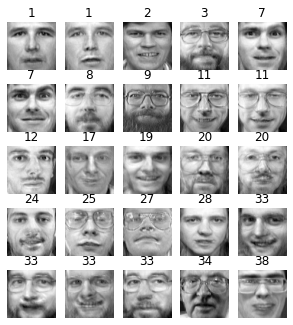

In [32]:
faces_gen = pca.inverse_transform(faces_gen_pca)
plot_faces(faces_gen,y_gen)

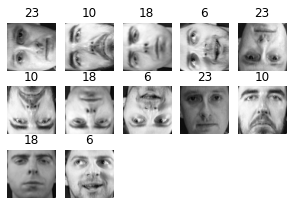

In [48]:
#modify few images e.g rotate,flip,darkened
#rotate means transposing axis
n_transposed = 4
transposed = np.transpose(x_train[:n_transposed].reshape(-1,64,64),axes = [0,2,1])
transposed = transposed.reshape(-1,64*64)
y_transposed = y_train[:n_transposed]
#flippting means reversing the data
n_flipped = 4
flipped = x_train[:n_flipped].reshape(-1,64,64)[:,::-1]
flipped = flipped.reshape(-1,64*64)
y_flipped = y_train[:n_flipped]
n_darkened = 4
dark = x_train[:n_darkened].copy()
dark[:,1:-1] *= 0.3
y_dark = y_train[:n_darkened]

x_bad_faces = np.r_[transposed, flipped, dark]
y_bad = np.concatenate([y_transposed, y_flipped, y_dark])

plot_faces(x_bad_faces, y_bad)

In [55]:
x_bad_faces_pca = pca.transform(x_bad_faces)

In [56]:
gm.score_samples(x_bad_faces_pca)

array([-5.12919319e+07, -3.15310694e+07, -2.95897842e+07, -4.73995697e+07,
       -2.57863641e+07, -5.03268340e+07, -5.07725031e+07, -3.74606630e+07,
       -1.10080757e+08, -8.83095408e+07, -8.80760158e+07, -8.43059207e+07])

In [57]:
gm.score_samples(x_train_pca[:10])

array([1168.94476605, 1118.66465995, 1118.664658  , 1129.35918178,
       1087.53033981, 1146.18455728, 1146.03684164, 1082.4922432 ,
       1168.65018111, 1129.35918049])

In [58]:
#difference is very well seen

## queston 13

In [59]:
x_train_pca

array([[ 2.209547  ,  8.177852  , -3.1609125 , ...,  0.10564157,
         0.11277861, -0.12381443],
       [-2.8795416 , -5.8527217 , -3.110265  , ..., -0.19480813,
        -0.07904775,  0.09704283],
       [-3.7210076 , -3.7166786 , -1.6135908 , ...,  0.10774902,
         0.06855667,  0.02084184],
       ...,
       [ 0.02803534, -1.4935063 ,  2.3138227 , ...,  0.12838477,
        -0.0618605 ,  0.01100494],
       [-2.0366464 , -2.057368  ,  1.7076209 , ..., -0.11621501,
        -0.04620515,  0.02863169],
       [ 4.3340683 ,  0.7842258 , -1.685574  , ...,  0.1418014 ,
        -0.18896052, -0.02665429]], dtype=float32)

In [60]:
x_train_red = pca.inverse_transform(x_train_pca)
def r_e(x_red,x):
    mse = np.square(x_red-x).mean()
    return mse

In [61]:
r_e(x_train_red,x_train)

0.00018892142

In [62]:
x_bad_faces_red = pca.inverse_transform(x_bad_faces_pca)
r_e(x_bad_faces_red,x_bad_faces)

0.006061273

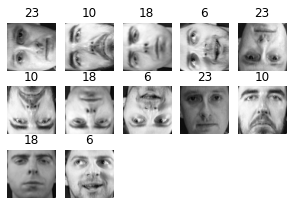

In [63]:
plot_faces(x_bad_faces,y_bad)


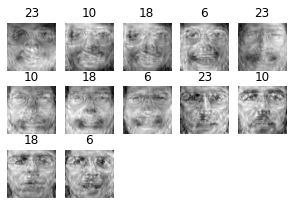

In [64]:
plot_faces(x_bad_faces_red,y_bad)